In [13]:
import pandas as pd
import numpy as np
from scipy.interpolate import interp2d

pd.set_option('max_columns', None)
pd.set_option('max_rows', 100)

# viz
import mplsoccer as mpl
from mplsoccer.pitch import Pitch, add_image
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# Quick look at whether we could in theory take a look at average positions from pass events (for attacking formations) and pressure events (for defensive formations) to do something like Laurie did 

### Loading both the SPADL Wyscout as well as our webscraped Opta to work with

In [2]:
df_opta = pd.read_csv('/Users/christian/Desktop/University/Birkbeck MSc Applied Statistics/Project/Data/Opta/EPL Data/Events/df_subevents_EPL_1718.csv')

In [41]:
df_opta.matchId.drop_duplicates().head(10)

0        918893
1791     918894
3475     918895
5036     918896
6591     918897
8201     918898
9941     918899
11646    918900
13153    918901
15012    918902
Name: matchId, dtype: int64

In [67]:
df_opta_match = df_opta.loc[df_opta['matchId'] == 918898].copy()

In [68]:
df_opta_match_home = df_opta_match.loc[df_opta_match['playerTeamId'] == df_opta_match['homeTeamId']]
df_opta_match_away = df_opta_match.loc[df_opta_match['playerTeamId'] == df_opta_match['awayTeamId']]

In [69]:
df_av_home = df_opta_match_home.loc[df_opta_match_home['eventSubType'] == 'Pass']\
        .groupby('playerId')\
        .agg({'x1':np.mean,'y1':np.mean,'minsPlayed':np.mean})\
        .reset_index()

#df_av_home = df_opta_match_home.loc[df_opta_match_home['eventSubType'] == 'Pressure on Pass']\
        #.groupby('playerId')\
        #.agg({'x1':np.mean,'y1':np.mean,'minsPlayed':np.mean})\
        #.reset_index()

df_av_home = df_av_home.loc[df_av_home['minsPlayed'] > 45]

In [70]:
df_av_home

,playerId,x1,y1,minsPlayed
0,20695,53.050000,10.706818,93
2,43670,59.296970,34.569697,75
3,51940,9.950000,49.604545,93
4,57249,53.378788,37.027273,88
5,58877,56.432353,87.326471,93
6,62398,47.161017,52.362712,93
7,66749,63.430769,37.246154,93
8,74208,55.222642,40.290566,93
9,76359,37.254545,67.703636,93
12,176297,74.986667,67.220000,79


In [71]:
df_opta_match_home

,matchId,playerId,playerName,position,detailedPosition,playerTeamId,minsPlayed,subIn,subOut,replacedReplacingPlayerId,booking,eventType,eventSubType,eventTypeId,x1,y1,x2,y2,gameTime,timeStamp,periodId,homeTeamName,homeTeamId,awayTeamName,awayTeamId,kickOffDateTime,minute,second
8201,918898,43670,Juan Mata,Midfielder,RightMidfielder,1,75,NaN,1.0,NaN,NaN,attack,Pass,1,50.0,50.0,41.1,59.6,0:1,2017-08-13 16:00:15.628,1,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,0,1
8202,918898,57249,Henrikh Mkhitaryan,Midfielder,AttackingMidfielder,1,88,NaN,1.0,NaN,NaN,attack,Pass,1,41.1,59.6,38.1,42.2,0:2,2017-08-13 16:00:17.100,1,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,0,2
8203,918898,62398,Nemanja Matic,Midfielder,DefensiveMidfielder,1,93,NaN,NaN,NaN,NaN,attack,Pass,1,38.1,42.2,36.0,29.5,0:3,2017-08-13 16:00:18.392,1,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,0,3
8204,918898,74208,Paul Pogba,Midfielder,DefensiveMidfielder,1,93,NaN,NaN,NaN,NaN,attack,Pass,1,36.0,29.5,27.6,63.1,0:4,2017-08-13 16:00:19.617,1,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,0,4
8205,918898,76359,Phil Jones,Defender,FullBack,1,93,NaN,NaN,NaN,NaN,attack,Pass,1,27.6,63.1,29.1,88.6,0:7,2017-08-13 16:00:21.777,1,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9932,918898,51940,David de Gea,Goalkeeper,Goalkeeper,1,93,NaN,NaN,NaN,NaN,attack,Pass,1,5.0,53.7,65.9,31.3,92:31,2017-08-13 17:49:25.173,2,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,92,31
9934,918898,41184,Marouane Fellaini,Midfielder,Substitute,1,18,1.0,NaN,NaN,NaN,attack,Aerial Duel,44,64.0,32.4,NaN,NaN,92:35,2017-08-13 17:49:29.766,2,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,92,35
9935,918898,41184,Marouane Fellaini,Midfielder,Substitute,1,18,1.0,NaN,NaN,NaN,attack,Pass,1,65.9,31.3,70.2,32.7,92:35,2017-08-13 17:49:29.843,2,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,92,35
9936,918898,109322,Jesse Lingard,Midfielder,Substitute,1,5,1.0,NaN,NaN,NaN,attack,Bad Touch,61,70.2,32.7,NaN,NaN,92:36,2017-08-13 17:49:30.688,2,Manchester United,1,West Ham United,21,2017-08-13 16:00:00.000,92,36


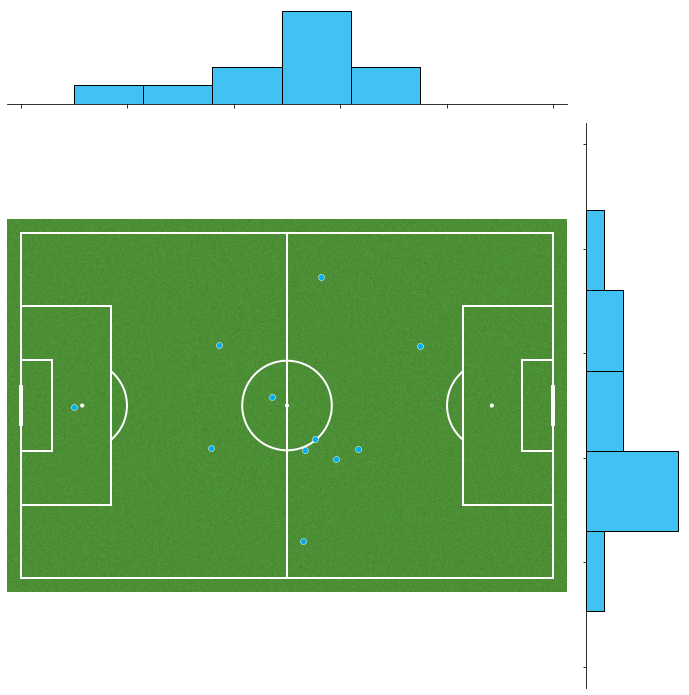

In [72]:
pitch = Pitch(figsize=(16, 20), pitch_color='grass', line_color='white', tight_layout=False, pitch_type='opta')

g = pitch.jointplot(df_av_home.x1, df_av_home.y1, height=10, alpha=1, color='#02adef')